In [739]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [180]:
# unemployment

df = pd.read_excel('../Life expectancy/Data/lebylapivot3.xlsx', sheet_name=2, skiprows=3)


In [309]:
df.head()

,Period,Country,Area type,Area code,Area name,Sex_code,Sex,Ageband,Age group,Life expectancy (LE),LE lower confidence interval,LE upper confidence interval
0,2001-2003,England,Combined Authority,E47000001,Greater Manchester,1,Male,1,<1,74.17,74.03,74.31
1,2001-2003,England,Combined Authority,E47000001,Greater Manchester,1,Male,2,01-04,73.70,73.57,73.83
2,2001-2003,England,Combined Authority,E47000001,Greater Manchester,1,Male,3,05-09,69.79,69.66,69.91
3,2001-2003,England,Combined Authority,E47000001,Greater Manchester,1,Male,4,10-14,64.84,64.71,64.96
4,2001-2003,England,Combined Authority,E47000001,Greater Manchester,1,Male,5,15-19,59.90,59.77,60.02


In [312]:
df['Area name'] = df['Area name'].str.lower()

In [314]:
df.groupby(['Area name','Period', "Age group"])['Life expectancy (LE)'].mean()


Area name                 Period     Age group
aberdeen city             2001-2003  01-04        76.350
                                     05-09        72.490
                                     10-14        67.510
                                     15-19        62.560
                                     20-24        57.720
                                                   ...  
yorkshire and the humber  2018-2020  75-79        11.825
                                     80-84         8.710
                                     85-89         6.090
                                     90+           4.110
                                     <1           80.285
Name: Life expectancy (LE), Length: 154800, dtype: float64

In [315]:
expectancy_at_brith_male = df[(df["Age group"] == '<1') & (df["Sex"] == 'Male')]

In [316]:
LE_max = expectancy_at_brith_male.groupby('Area name').agg({'Life expectancy (LE)': [ 'max']})

In [317]:
LE_max.sort_values(by=('Life expectancy (LE)','max'))

,Life expectancy (LE)
,max
Area name,
glasgow city,73.60
blackpool,74.64
west dunbartonshire,75.06
dundee city,75.26
north lanarkshire,75.37
...,...
harrow,83.25
camden,83.27


In [318]:
Mean_UK = expectancy_at_brith_male.groupby('Period')["Life expectancy (LE)"].mean()


In [319]:
Glasgow = expectancy_at_brith_male[expectancy_at_brith_male["Area name"] == 'glasgow city']

Blackpool = expectancy_at_brith_male[expectancy_at_brith_male["Area name"] == 'blackpool']

Westminster = expectancy_at_brith_male[expectancy_at_brith_male["Area name"] == 'westminster']

In [323]:
summary_periods = expectancy_at_brith_male.groupby(['Area name','Period'])['Life expectancy (LE)'].mean().to_frame().reset_index()

In [620]:
summary_periods[summary_periods['Area name'] == 'blackpool']

,Area name,Period,Life expectancy (LE)
540,blackpool,2001-2003,72.02
541,blackpool,2002-2004,72.85
542,blackpool,2003-2005,73.19
543,blackpool,2004-2006,73.35
544,blackpool,2005-2007,73.18
545,blackpool,2006-2008,73.58
546,blackpool,2007-2009,73.72
547,blackpool,2008-2010,73.71
548,blackpool,2009-2011,73.72
549,blackpool,2010-2012,73.94


In [621]:
Mean_UK[0] - 72.02

4.165879629629643

In [324]:
change_expect = []
for i in range(0,len(summary_periods),18):
    print(summary_periods.iloc[i,0:2])
    a=i+18-1
    print(summary_periods.iloc[a,0:2])
    change = summary_periods.iloc[a,2] - summary_periods.iloc[i,2]
    change_expect.append(change)

Area name    aberdeen city
Period           2001-2003
Name: 0, dtype: object
Area name    aberdeen city
Period           2018-2020
Name: 17, dtype: object
Area name    aberdeenshire
Period           2001-2003
Name: 18, dtype: object
Area name    aberdeenshire
Period           2018-2020
Name: 35, dtype: object
Area name         adur
Period       2001-2003
Name: 36, dtype: object
Area name         adur
Period       2018-2020
Name: 53, dtype: object
Area name    allerdale
Period       2001-2003
Name: 54, dtype: object
Area name    allerdale
Period       2018-2020
Name: 71, dtype: object
Area name    amber valley
Period          2001-2003
Name: 72, dtype: object
Area name    amber valley
Period          2018-2020
Name: 89, dtype: object
Area name    aneurin bevan university health board/ bwrdd i...
Period                                               2001-2003
Name: 90, dtype: object
Area name    aneurin bevan university health board/ bwrdd i...
Period                                      

In [325]:
change_expect_series = pd.Series(change_expect)

In [326]:
councils = summary_periods['Area name'].unique()


In [328]:
d = {'council':councils, 'change_birth':change_expect_series}
councils_change_birth = pd.DataFrame(data=d)

In [536]:
councils_change_birth.sort_values(by='change_birth').head(30)

,council,change_birth
68,ceredigion,0.47
204,lincoln,0.91
267,oadby and wigston,1.17
51,burnley,1.31
304,scarborough,1.34
41,brentwood,1.41
42,bridgend,1.45
266,nuneaton and bedworth,1.51
65,castle point,1.54
88,crawley,1.59


In [377]:
councils_change_birth[councils_change_birth['council'] =='blackpool']

,council,change_birth
30,blackpool,2.06


In [508]:
from matplotlib import font_manager

url = '/Users/mauropazmino/Library/Fonts/RobotoCondensed-Bold.ttf'

# Create a Matplotlib Font object from our `.ttf` file
font = font_manager.FontEntry(fname=str(url), name="Roboto Condense")

# Register this object with Matplotlib's ttf list
font_manager.fontManager.ttflist.append(font)
# Print the last few items to see what they look like
print(font_manager.fontManager.ttflist[-3:])



[FontEntry(fname='/Users/mauropazmino/Library/Fonts/', name='Roboto Condense', style='normal', variant='normal', weight='normal', stretch='normal', size='medium'), FontEntry(fname='/Users/mauropazmino/Library/Fonts/RobotoCondensed-Bold.ttf', name='Roboto Condense', style='normal', variant='normal', weight='normal', stretch='normal', size='medium'), FontEntry(fname='/Users/mauropazmino/Library/Fonts/RobotoCondensed-Bold.ttf', name='Roboto Condense', style='normal', variant='normal', weight='normal', stretch='normal', size='medium')]


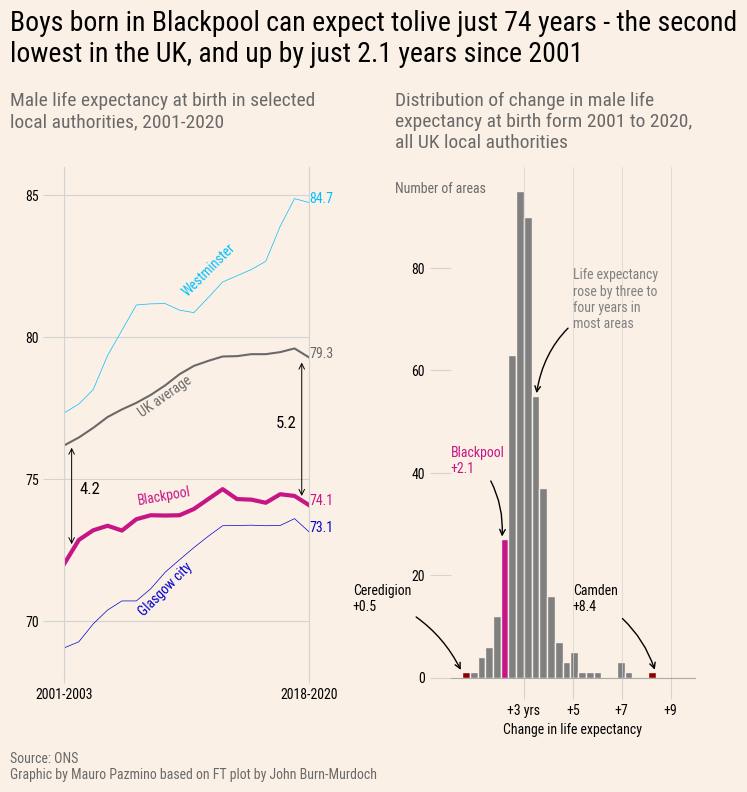

In [743]:
plt.rcParams["font.family"] = font.name



lineswid = 0.5

fig, (ax, ax2) = plt.subplots(1,2,figsize=(7,6), tight_layout=True,facecolor='linen')
ax.set_facecolor('linen')
ax2.set_facecolor('linen')


ax.plot(Glasgow['Period'],Glasgow['Life expectancy (LE)'],color='mediumblue', linewidth=lineswid)
ax.plot(Blackpool['Period'],Blackpool['Life expectancy (LE)'], linewidth=3,color='mediumvioletred')
ax.plot(Westminster['Period'],Westminster['Life expectancy (LE)'], color='deepskyblue', linewidth=lineswid)

ax.plot(Westminster['Period'],Mean_UK, color='dimgrey')

ax.set_xlim("2001-2003","2018-2020")
ax.set_ylim(68,86)
ax.xaxis.set_major_locator(ticker.MultipleLocator(17))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

ax.spines.bottom.set_visible(False)
ax.spines.top.set_visible(False)

ax.grid(color='lightgray')



ax.spines['right'].set_color('lightgray')
ax.spines['left'].set_color('lightgray')

glasgow = Glasgow.iloc[-1,9]
blackpool = Blackpool.iloc[-1,9]
westmister = Westminster.iloc[-1,9]
uk_av = Mean_UK[-1]

ax.tick_params(axis='x', colors='lightgray', labelcolor='k')
ax.tick_params(axis='y', colors='lightgray',labelcolor='k',length=15)

ax.text(y=Glasgow.iloc[-1,9],x=Glasgow.iloc[-1,0], s=f'{glasgow:.1f}',color='mediumblue')

ax.text(y=Blackpool.iloc[-1,9],x=Blackpool.iloc[-1,0], s=f'{blackpool:.1f}',color='mediumvioletred', fontweight='bold')

ax.text(y=Westminster.iloc[-1,9],x=Westminster.iloc[-1,0], s=f'{westmister:.1f}',color='deepskyblue')

ax.text(x=Westminster.iloc[-1,0],y=Mean_UK[-1], s=f'{uk_av:.1f}',color='dimgray')



ax2.hist(change_expect_series, bins=25, color='gray',edgecolor='linen')
n, bin1, patches1 = ax2.hist(change_expect_series, bins=25, color='gray',edgecolor='linen')

patches1[-1].set_fc('darkred')
patches1[0].set_fc('darkred')
patches1[5].set_fc('mediumvioletred')

ax2.spines.right.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines['bottom'].set_color('darkgray')
ax2.set_xlim(0,10)
ax2.tick_params(axis='y', colors='lightgray',labelcolor='k',length=15)
ax2.tick_params(axis='x', colors='lightgray',labelcolor='k',length=15)

ax2.axvline(x=3,color='lightgray',linewidth=lineswid)
ax2.axvline(x=5,color='lightgray',linewidth=lineswid)
ax2.axvline(x=7,color='lightgray',linewidth=lineswid)
ax2.axvline(x=9,color='lightgray',linewidth=lineswid)


#ax2.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.set_xticks([3, 5, 7, 9])
ax2.set_xticklabels(["+3 yrs", '+5', "+7","+9"])



ax2.set_xlabel('Change in life expectancy')


fig.text(x=0.55,y=1.1,s='Distribution of change in male life\nexpectancy at birth form 2001 to 2020,\nall UK local authorities', fontdict={'fontsize':14,"family": font.name},va='top',color='dimgrey')

fig.text(x=0.55,y=0.95,s='Number of areas', fontdict={'fontsize':10,"family": font.name},va='top', weight='bold',color='dimgrey')

fig.text(x=0,y=1.1,s="Male life expectancy at birth in selected\nlocal authorities, 2001-2020",fontdict={'fontsize':14,"family": font.name},va='top',color='dimgrey')

fig.text(x=0,y=1.15,s='Boys born in Blackpool can expect to live just 74 years - the second\nlowest in the UK, and up by just 2.1 years since 2001', ha='left',fontdict={'fontsize':20, "family": font.name})


ax2.annotate('Ceredigion\n+0.5', xy=(0.47, 1), xytext=(-4, 13),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))


ax2.annotate('Camden\n+8.4', xy=(8.39, 1), xytext=(5, 13),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax2.annotate('Blackpool\n+2.1', xy=(2.1, 27), xytext=(0, 40),color='mediumvioletred', fontweight='bold',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))


ax2.annotate('Life expectancy\nrose by three to\nfour years in\nmost areas ', xy=(3.5, 55), xytext=(5, 80),va='top',color='gray',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.3"))

ax.annotate(text='', xy=(16.5,74.3), xytext=(16.5,79.2), arrowprops=dict(arrowstyle='<->',lw=0.7),)

ax.annotate(text='', xy=(0.5,72.6), xytext=(0.5,76.2), arrowprops=dict(arrowstyle='<->',lw=0.7),)

fig.text(x=0.38,y=0.54,s='5.2', ha='left',fontdict={'fontsize':12, "family": font.name})

fig.text(x=0.1,y=0.43,s='4.2', ha='left',fontdict={'fontsize':12, "family": font.name})



ax.annotate('Glasgow city', xy=(Glasgow.iloc[5,0], Glasgow.iloc[5,9]-0.5), xytext=(Glasgow.iloc[5,0], Glasgow.iloc[5,9]-0.5),rotation=45,color='mediumblue')

ax.annotate('Blackpool', xy=(Blackpool.iloc[5,0], Blackpool.iloc[5,9]+0.5), xytext=(Blackpool.iloc[5,0], Blackpool.iloc[5,9]+0.5),rotation=10,color='mediumvioletred')

ax.annotate('Westminster', xy=(Westminster.iloc[8,0], Westminster.iloc[8,9]+0.5), xytext=(Westminster.iloc[8,0], Westminster.iloc[8,9]+0.5),rotation=45,color='deepskyblue')


ax.annotate('UK average', xy=(Glasgow.iloc[5,0], Mean_UK[5]-0.5), xytext=(Glasgow.iloc[5,0], Mean_UK[5]-0.5),rotation=35,color='dimgray')




fig.text(x=0,y=0,s="Source: ONS\nGraphic by Mauro Pazmino based on FT plot by John Burn-Murdoch",fontdict={'fontsize':10,"family": font.name},va='top',color='dimgrey')

fig.savefig("../Life expectancy/Life_expectancy_FT_style.png", dpi=300,bbox_inches='tight')
